In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [3]:
import os

# Specify the path to the copied unzipped folder
copied_folder = r'D:\mp\dataset'

# Initialize counters for directories and files
total_directories = 0
total_files = 0

# Walk through the directory tree
for dirpath, dirnames, filenames in os.walk(copied_folder):
    total_directories += len(dirnames)
    total_files += len(filenames)
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

# Print total counts
print(f"Total directories: {total_directories}")
print(f"Total files: {total_files}")

There are 4 directories and 0 files in 'D:\mp\dataset'.
There are 0 directories and 726 files in 'D:\mp\dataset\Closed'.
There are 0 directories and 725 files in 'D:\mp\dataset\no_yawn'.
There are 0 directories and 726 files in 'D:\mp\dataset\Open'.
There are 0 directories and 723 files in 'D:\mp\dataset\yawn'.
Total directories: 4
Total files: 2900


In [4]:
import os
import numpy as np

# Specify the path to the copied unzipped folder
copied_folder = r'D:\mp\dataset'

# Get a list of directories within the copied folder
class_names = np.array(sorted([dir_name for dir_name in os.listdir(copied_folder) if os.path.isdir(os.path.join(copied_folder, dir_name))]))

print(class_names)

['Closed' 'Open' 'no_yawn' 'yawn']


649.jpg
D:\mp\dataset\yawn\649.jpg
Image shape: (480, 640, 3)


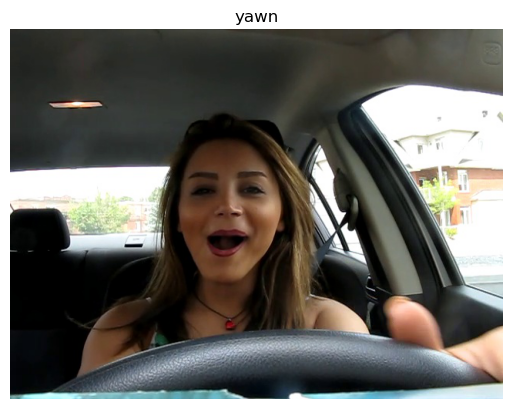

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
    # Specify the path to the copied unzipped folder
    copied_folder = r'D:\mp\dataset'

    # Construct the path to the target folder
    target_folder = os.path.join(copied_folder, target_class)

    # Get a list of image files in the target folder
    image_files = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]

    # Select a random image file from the list
    random_image = random.choice(image_files)
    print(random_image)

    # Get the full path of the randomly chosen image file
    random_image_path = os.path.join(target_folder, random_image)
    print(random_image_path)

    # Load and display the image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

# Example usage
img = view_random_image(target_dir="train/", target_class="yawn")

In [6]:
img.shape

(480, 640, 3)

_622.jpg
D:\mp\dataset\Closed\_622.jpg
Image shape: (300, 351, 3)
_516.jpg
D:\mp\dataset\Open\_516.jpg
Image shape: (300, 357, 3)
601.jpg
D:\mp\dataset\yawn\601.jpg
Image shape: (480, 640, 3)
176.jpg
D:\mp\dataset\no_yawn\176.jpg
Image shape: (480, 640, 3)


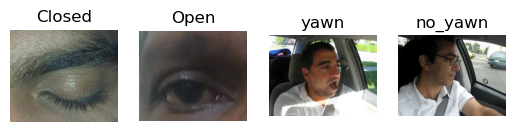

In [7]:
# Visualize the data
plt.figure()
plt.subplot(1, 4, 1)
closed_img = view_random_image("train/", "Closed")
plt.subplot(1, 4, 2)
open_img = view_random_image("train/", "Open")
plt.subplot(1, 4, 3)
yawn_img = view_random_image("train/", "yawn")
plt.subplot(1, 4, 4)
noyawn_img = view_random_image("train/", "no_yawn")

In [8]:
!pip install mediapipe --user

In [9]:
import cv2

def load_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            print("Image loaded successfully.")
            return image
        else:
            print("Failed to load the image. The file may be corrupt or in an unsupported format.")
            return None
    except Exception as e:
        print(f"An error occurred while loading the image: {e}")
        return None

# Example usage:
image_path = "D:\mp\dataset\yawn\91.jpg"
image = load_image(image_path)

Image loaded successfully.


0
1


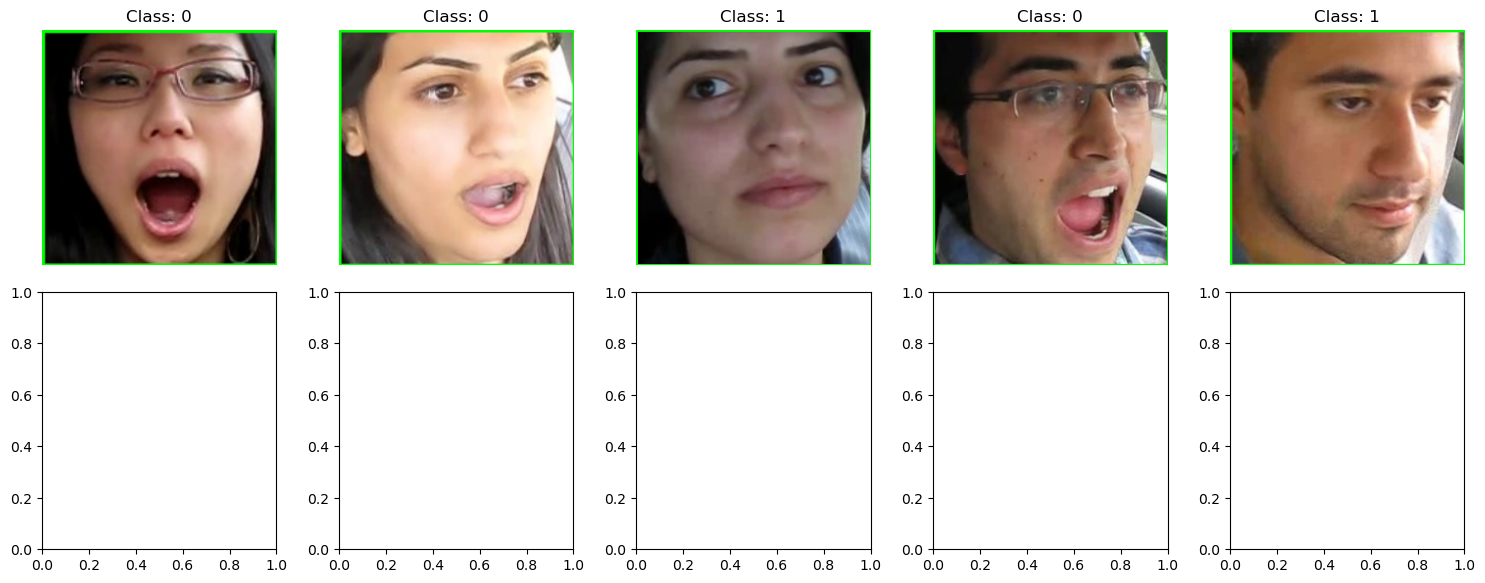

In [3]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import random
def visualize_data(data):
    # Plot some random samples from the data
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for i in range(5):
        index = random.randint(0, len(data)-1)
        sample, label = data[index]
        axes[i].imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
        axes[i].set_title('Class: {}'.format(label))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
def face_for_yawn(direc=r"D:\mp\dataset"):
    yaw_no = []
    IMG_SIZE = 240
    categories = ["yawn", "no_yawn"]

    # Initialize MediaPipe Face Detection
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

            # Convert image to RGB and detect faces
            results = face_detection.process(image_rgb)

            if results.detections:
                for detection in results.detections:
                    bbox = detection.location_data.relative_bounding_box
                    ih, iw, _ = image_array.shape
                    x, y, w, h = int(bbox.xmin * iw), int(bbox.ymin * ih), \
                                 int(bbox.width * iw), int(bbox.height * ih)
                    img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    roi_color = img[y:y+h, x:x+w]
                    
                    # Check if the face region is not empty before resizing
                    if roi_color.size != 0:
                        resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                        yaw_no.append([resized_array, class_num1])

    return yaw_no

yawn_no_yawn = face_for_yawn()
visualize_data(yawn_no_yawn)

2
3


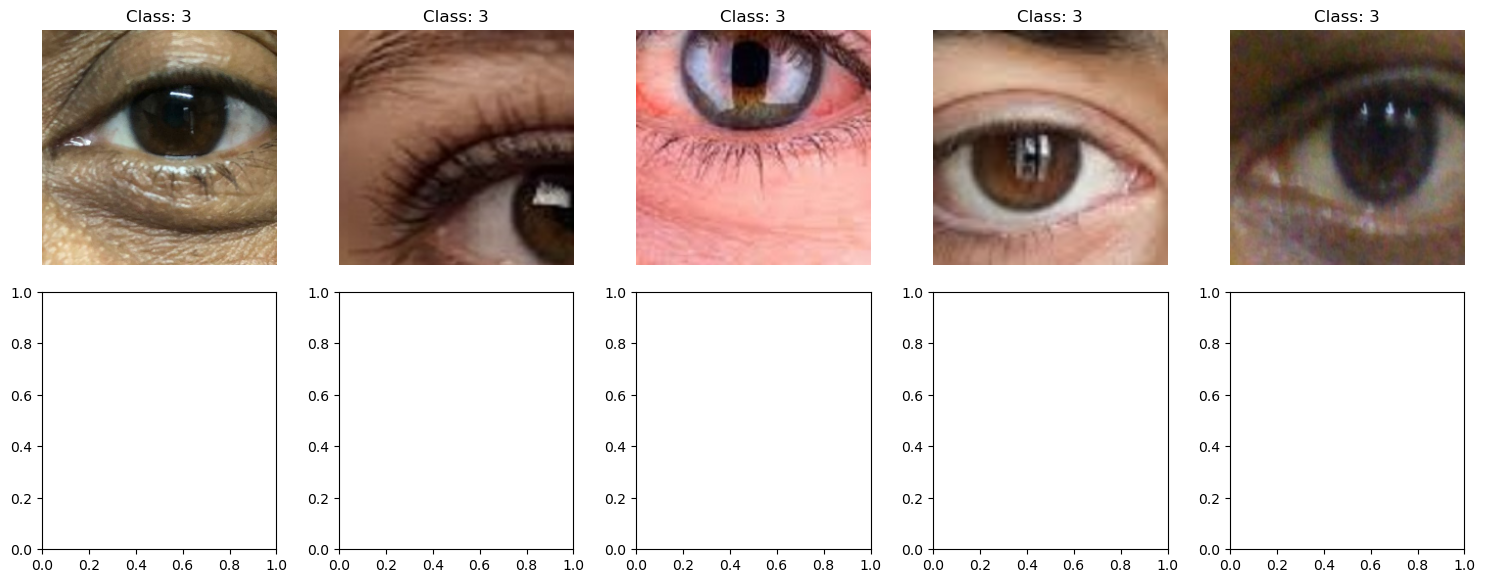

In [5]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import random

def visualize_data(data):
    # Plot some random samples from the data
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for i in range(5):
        index = random.randint(0, len(data)-1)
        sample, label = data[index]
        axes[i].imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
        axes[i].set_title('Class: {}'.format(label))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
def get_data(dir_path=r"D:\mp\dataset"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 240
    data = []

    # Initialize MediaPipe Face Detection
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

    for label in labels:
        path = os.path.join(os.getcwd(), dir_path, label)
        class_num = labels.index(label)
        class_num += 2  # Increment class number to avoid conflict with face classes
        print(class_num)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path, img))
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Detect face
                results = face_detection.process(image_rgb)
                if results.detections:
                    for detection in results.detections:
                        bbox = detection.location_data.relative_bounding_box
                        ih, iw, _ = image.shape
                        x, y, w, h = int(bbox.xmin * iw), int(bbox.ymin * ih), \
                                     int(bbox.width * iw), int(bbox.height * ih)
                        face_roi = image[y:y+h, x:x+w]

                        # Check if the face region is not empty before resizing
                        if face_roi.size != 0:
                            # Resize face ROI
                            resized_face = cv2.resize(face_roi, (IMG_SIZE, IMG_SIZE))
                            data.append([resized_face, class_num])

            except Exception as e:
                print(e)
    return data  

data_train = get_data()
visualize_data(data_train)

In [12]:
import pandas as pd

def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    
    # Determine the number of columns in the data
    num_cols = len(data[0]) if data else 0
    
    # Define column names based on the number of columns in the data
    column_names = [f'col{i+1}' for i in range(num_cols)]
    
    # Create a DataFrame from the data with appropriate column names
    df_data = pd.DataFrame(data, columns=column_names)
    
    # Create a DataFrame from yaw_no
    df_yaw_no = pd.DataFrame(yaw_no, columns=['yaw_no_image', 'yaw_no_label'])
    
    # Concatenate both DataFrames along the columns
    df = pd.concat([df_data, df_yaw_no], axis=1)
    
    return df

new_data = append_data()


0
1
2
3


In [13]:
x = []
y = []
for index, row in new_data.iterrows():
    feature = row['col1']  # Update 'col1' to the actual column name containing features
    label = row['col2']    # Update 'col2' to the actual column name containing labels
    x.append(feature)
    y.append(label)
print(x)  


[array([[[ 39,  39,  51],
        [ 39,  39,  51],
        [ 39,  39,  51],
        ...,
        [ 83,  85,  95],
        [ 90,  92, 102],
        [ 96,  98, 108]],

       [[ 39,  39,  51],
        [ 39,  39,  51],
        [ 38,  38,  51],
        ...,
        [ 83,  85,  95],
        [ 90,  92, 102],
        [ 96,  98, 108]],

       [[ 40,  40,  52],
        [ 39,  39,  51],
        [ 38,  38,  50],
        ...,
        [ 83,  85,  95],
        [ 90,  92, 102],
        [ 96,  98, 108]],

       ...,

       [[161, 163, 174],
        [159, 160, 174],
        [157, 158, 172],
        ...,
        [178, 166, 168],
        [176, 163, 167],
        [172, 161, 164]],

       [[162, 164, 175],
        [161, 162, 175],
        [159, 161, 174],
        ...,
        [170, 158, 161],
        [167, 155, 160],
        [163, 153, 158]],

       [[163, 165, 176],
        [162, 163, 177],
        [161, 162, 176],
        ...,
        [164, 153, 157],
        [161, 150, 156],
        [158, 148, 154]

In [14]:
!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_curve
from tensorflow.keras.applications import ResNet50V2
  #from tensorflow.keras.applications import InceptionResNetV2 # Use Inception-ResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [16]:
# Check GPU availability
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
[]


In [17]:
# Load the dataset and visualize images
labels = os.listdir(r"C:\Users\bhavy\cnn\archive\train")

In [18]:
# Load the data using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30
)


In [19]:
# Load the dataset and split into training and testing sets
directory = r"C:\Users\bhavy\cnn\archive\train"
target_size = (240, 240)
batch_size = 4000  # Adjust batch size as needed

In [20]:
# Load the dataset and split into training and testing sets
data = datagen.flow_from_directory(
    directory,
    target_size=target_size,
    batch_size=batch_size,  # Specify batch size here
    class_mode='categorical',
    subset='training'
)

Found 2321 images belonging to 4 classes.


In [21]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.3)

In [22]:
train_data = train_data_gen.flow_from_directory(r"C:\Users\bhavy\cnn\archive\train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2033 images belonging to 4 classes.


In [23]:
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.3)

In [24]:
validation_data = val_data_gen.flow_from_directory(r"C:\Users\bhavy\cnn\archive\train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='validation')

Found 867 images belonging to 4 classes.


In [25]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [26]:
test_data = test_data_gen.flow_from_directory(r"C:\Users\bhavy\cnn\archive\train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [29]:
# Split the data into training and testing sets
x, y = data.next()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import LabelBinarizer

# Encode the labels using one-hot encoding
label_bin = LabelBinarizer()
y_train = label_bin.fit_transform(y_train)
y_test = label_bin.transform(y_test)


In [31]:
len(x_test)

465

In [32]:
len(x_train)

1856

In [33]:
x_train

array([[[[0.8251508 , 0.72319   , 0.65652335],
         [0.822045  , 0.72008425, 0.6534176 ],
         [0.8192736 , 0.7173128 , 0.6506461 ],
         ...,
         [0.83261603, 0.70712584, 0.6247729 ],
         [0.83610904, 0.71061885, 0.6282659 ],
         [0.83921576, 0.7137255 , 0.6313726 ]],

        [[0.8246267 , 0.73113906, 0.6616479 ],
         [0.8261795 , 0.72803324, 0.6600951 ],
         [0.8268883 , 0.72492754, 0.6582608 ],
         ...,
         [0.83438295, 0.70889276, 0.6265398 ],
         [0.83787596, 0.7123858 , 0.6300328 ],
         [0.83921576, 0.7137255 , 0.6313726 ]],

        [[0.8264068 , 0.7362107 , 0.6656225 ],
         [0.8248539 , 0.7346578 , 0.6640696 ],
         [0.8237579 , 0.73287654, 0.6625167 ],
         ...,
         [0.8361499 , 0.7106596 , 0.6283067 ],
         [0.83921576, 0.7137255 , 0.6313726 ],
         [0.83921576, 0.7137255 , 0.6313726 ]],

        ...,

        [[0.9725491 , 0.9058824 , 0.8352942 ],
         [0.9725491 , 0.9058824 , 0.8352942 ]

In [34]:
y_test

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [35]:
test_data

In [36]:
train_data

In [37]:
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(240, 240, 3)) #from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

In [38]:
# Add custom layers for classification on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23696196 (90.39 MB)
Trainable params: 23650756 (90.22 MB)
Non-trainable params: 45440 (177.50 KB)
__________

In [39]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [40]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23696196 (90.39 MB)
Trainable params: 131396 (513.27 KB)
Non-trainable params: 23564800 (89.89 MB)
_________

In [41]:
# Train the model
hist = model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test), batch_size=55)  # 45Specify batch size here

Epoch 1/35


34/34 [==============================] - 354s 10s/step - loss: 0.5166 - accuracy: 0.7608 - val_loss: 0.2934 - val_accuracy: 0.8538
Epoch 2/35
34/34 [==============================] - 336s 10s/step - loss: 0.3196 - accuracy: 0.8341 - val_loss: 0.2676 - val_accuracy: 0.8710
Epoch 3/35
34/34 [==============================] - 307s 9s/step - loss: 0.2841 - accuracy: 0.8588 - val_loss: 0.2542 - val_accuracy: 0.8688
Epoch 4/35
34/34 [==============================] - 333s 10s/step - loss: 0.2354 - accuracy: 0.8874 - val_loss: 0.2433 - val_accuracy: 0.8817
Epoch 5/35
34/34 [==============================] - 301s 9s/step - loss: 0.2275 - accuracy: 0.8879 - val_loss: 0.2796 - val_accuracy: 0.8495
Epoch 6/35
34/34 [==============================] - 301s 9s/step - loss: 0.2234 - accuracy: 0.9025 - val_loss: 0.2338 - val_accuracy: 0.8839
Epoch 7/35
34/34 [==============================] - 301s 9s/step - loss: 0.1882 - accuracy: 0.9154 - val_loss: 0.2438 - val_accuracy: 0.8731
Epoch 8/

In [42]:
# Save the model
model.save("drowsiness_resnet50v2_new1.h5")


C:\Users\bhavy\anaconda32\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
model.save("drowsiness_resnet50v2_new1.model")


INFO:tensorflow:Assets written to: drowsiness_resnet50v2_new1.model\assets


INFO:tensorflow:Assets written to: drowsiness_resnet50v2_new1.model\assets


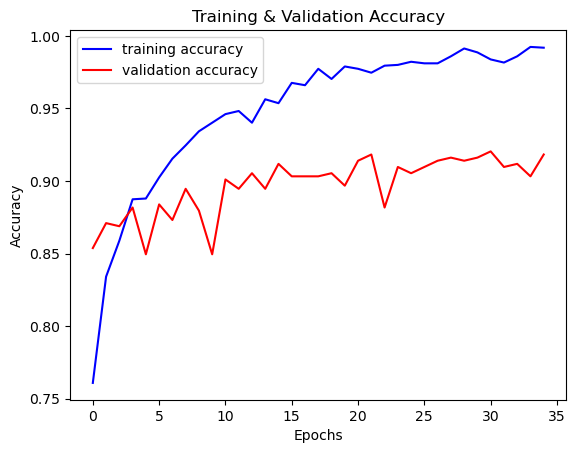

In [44]:
# Plot accuracy and loss
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

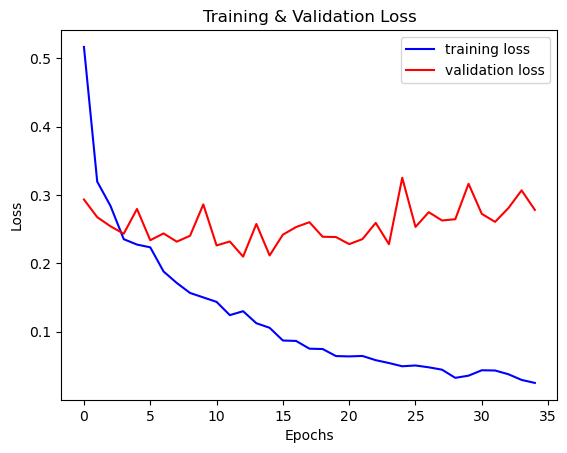

In [45]:
plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


In [46]:
s=['closed','open','no_yawn','yawn']

In [47]:
# Make predictions and evaluate the model
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical


y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded, convert it to class indices
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
num_classes = len(s)  # Assuming `s` contains the names of your classes


# Convert y_pred_classes to one-hot encoded format
y_pred_one_hot = to_categorical(y_pred_classes, num_classes=num_classes)

print(classification_report(y_test, y_pred_one_hot, target_names=s))


15/15 [==============================] - 17s 1s/step
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00       121
        open       1.00      1.00      1.00       109
     no_yawn       0.82      0.91      0.86       129
        yawn       0.87      0.75      0.81       106

   micro avg       0.92      0.92      0.92       465
   macro avg       0.92      0.92      0.92       465
weighted avg       0.92      0.92      0.92       465
 samples avg       0.92      0.92      0.92       465



In [48]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

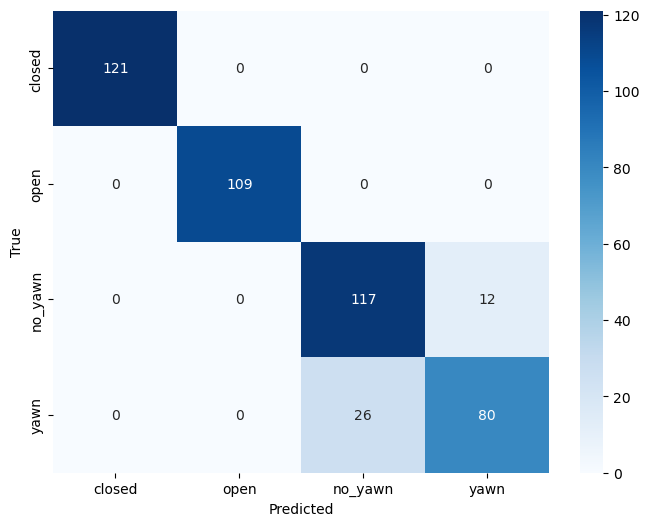

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the confusion matrix stored in `cf_matrix`
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
ax.set_xticklabels(['closed','open','no_yawn','yawn'])  # Set x-axis tick labels
ax.set_yticklabels(['closed','open','no_yawn','yawn'])  # Set y-axis tick labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [50]:
# Print the confusion matrix
print("Confusion Matrix:\n", confusion_mtx)

Confusion Matrix:
 [[121   0   0   0]
 [  0 109   0   0]
 [  0   0 117  12]
 [  0   0  26  80]]


In [51]:
# Accuracy Score
accuracy = np.sum(y_true == y_pred_classes) / len(y_true)
print("Accuracy:", accuracy)


Accuracy: 0.9182795698924732


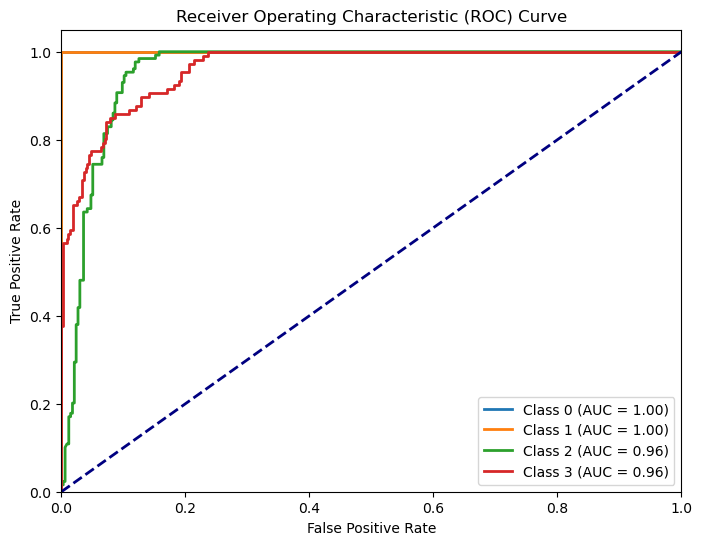

In [52]:
# Compute ROC curves and AUC for each class
n_classes = 4
fpr = dict()
tpr = dict()

roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [53]:
import tensorflow as tf
import numpy as np
import cv2

In [54]:
import cv2
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection

IMG_SIZE = 80

def prepare(filepath):
    # Load the image
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    
    # Convert the image to RGB (MediaPipe uses RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Initialize MediaPipe face detection
    with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        # Convert the RGB image to MediaPipe's format
        results = face_detection.process(img_rgb)
        
        # If faces are detected
        if results.detections:
            # Get the bounding box coordinates of the first detected face
            bboxC = results.detections[0].location_data.relative_bounding_box
            ih, iw, _ = img.shape
            
            # Convert the relative coordinates to absolute coordinates
            xmin = int(bboxC.xmin * iw)
            ymin = int(bboxC.ymin * ih)
            xmax = int((bboxC.xmin + bboxC.width) * iw)
            ymax = int((bboxC.ymin + bboxC.height) * ih)
            
            # Crop the face region from the image
            face_img = img[ymin:ymax, xmin:xmax]
            
            # Resize the cropped face image to the desired size
            resized_array = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))
            
            # Normalize the pixel values to the range [0, 1]
            resized_array = resized_array / 255
            
            # Return the resized and normalized face image
            return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        else:
            # If no faces are detected, return None
            return None

# Load the model
#model = tf.keras.models.load_model("D:/mp/dataset/drowsiness_new6.h5")


In [55]:
import cv2
import numpy as np

# Define the prepare function to load and preprocess the image
def prepare(filepath):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Preprocess the image (e.g., resize, normalize, etc.)
    # Replace this with your actual preprocessing steps
    # Convert the image to the appropriate format for model input
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize the image if needed
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img

# Specify the file path to the image
image_path = r"C:\Users\bhavy\cnn\archive\train\Closed\_0.jpg"

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the index of the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted class index
print("Predicted class index:", predicted_class)


1/1 [==============================] - 1s 1s/step
Predicted class index: 0


In [56]:
import cv2
import numpy as np

# Define the prepare function to load and preprocess the image
def prepare(filepath):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Preprocess the image (e.g., resize, normalize, etc.)
    # Replace this with your actual preprocessing steps
    # Convert the image to the appropriate format for model input
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize the image if needed
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img

# Specify the file path to the image
image_path = r"C:\Users\bhavy\cnn\archive\train\open\_1.jpg"

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the index of the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted class index
print("Predicted class index:", predicted_class)



1/1 [==============================] - 0s 126ms/step
Predicted class index: 1


In [57]:
import cv2
import numpy as np

# Define the prepare function to load and preprocess the image
def prepare(filepath):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Preprocess the image (e.g., resize, normalize, etc.)
    # Replace this with your actual preprocessing steps
    # Convert the image to the appropriate format for model input
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize the image if needed
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img

# Specify the file path to the image
image_path = r"C:\Users\bhavy\cnn\archive\train\yawn\91.jpg"

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the index of the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted class index
print("Predicted class index:", predicted_class)



1/1 [==============================] - 0s 126ms/step
Predicted class index: 3


In [61]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define the prepare function to load and preprocess the image
def prepare(filepath):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Preprocess the image (e.g., resize, normalize, etc.)
    # Replace this with your actual preprocessing steps
    # Convert the image to the appropriate format for model input
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize the image if needed
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img

# Specify the file path to the image
image_path = r"C:\\Users\\bhavy\\cnn\\archive\\train\\closed\\_0.jpg"

# Load the trained model
model = load_model("C:\\Users\\bhavy\\drowsiness_resnet50v2_new1.h5")

# Define image dimensions
IMG_SIZE = 240

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the predicted class label
predicted_class = "drowsy" if prediction[0][0] > 0.5 else "non-drowsy"

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 2s 2s/step
Predicted class: drowsy


In [62]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define the prepare function to load and preprocess the image
def prepare(filepath):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Preprocess the image (e.g., resize, normalize, etc.)
    # Replace this with your actual preprocessing steps
    # Convert the image to the appropriate format for model input
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize the image if needed
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    return img

# Specify the file path to the image
image_path = r"C:\\Users\\bhavy\\cnn\\archive\\train\\no_yawn\\91.jpg"

# Load the trained model
model = load_model("C:\\Users\\bhavy\\drowsiness_resnet50v2_new1.h5")

# Define image dimensions
IMG_SIZE = 240

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the predicted class label
predicted_class = "drowsy" if prediction[0][0] > 0.5 else "non-drowsy"

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 3s 3s/step
Predicted class: non-drowsy
